<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Gender Classification
    </h1>
    </div>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORT NEEDED LIBRARIES
    </h1>
    </div>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Data Manipulation
    </h1>
    </div>

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
df = pd.read_csv("gender_classification.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [8]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.shape[0]

5001

In [10]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [11]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [12]:
len(df[df.duplicated])

1768

In [13]:
df.drop_duplicates(inplace=True)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Data Visualization
    </h1>
    </div>

In [14]:
df[["long_hair","gender"]].groupby("gender").get_group("Female")["long_hair"].value_counts()

long_hair
1    1184
0     266
Name: count, dtype: int64

In [15]:
df[["long_hair","gender"]].groupby("gender").get_group("Male")["long_hair"].value_counts()

long_hair
1    1475
0     308
Name: count, dtype: int64

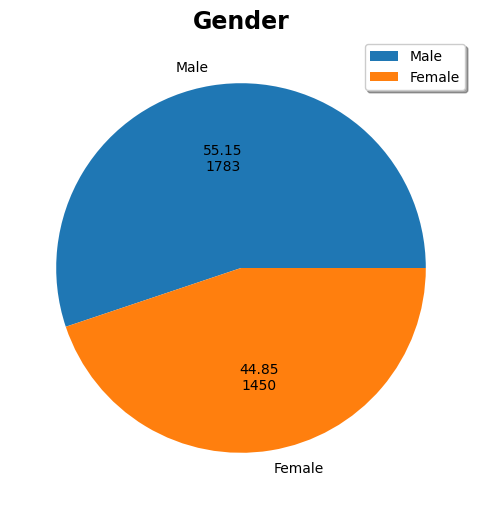

In [16]:
def fun(pct,all_values):
    absolute = (pct/100) * np.sum(all_values)
    return f"{pct :.2f}\n{absolute :.0f}"


plt.figure(figsize=(8,6))
plt.title("Gender",weight='bold',fontsize=17)
plt.pie(df.gender.value_counts().values,labels=df.gender.value_counts().index,autopct=lambda x:fun(x,df.gender.value_counts().values))
plt.legend(shadow=True)
plt.show()

In [17]:
l = []
for i in df.dtypes.index:
    if df[i].dtype == np.int64:
        l.append(i)
l

['long_hair',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']

<Figure size 800x2000 with 0 Axes>

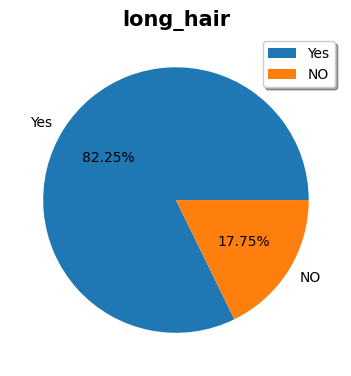

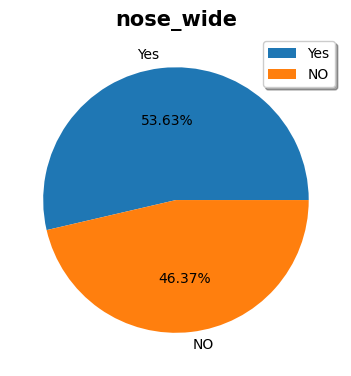

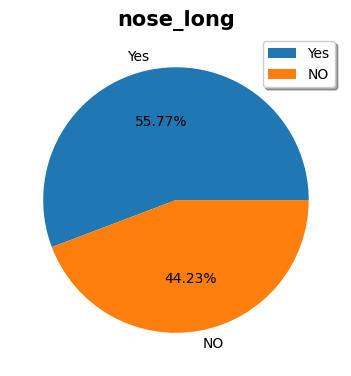

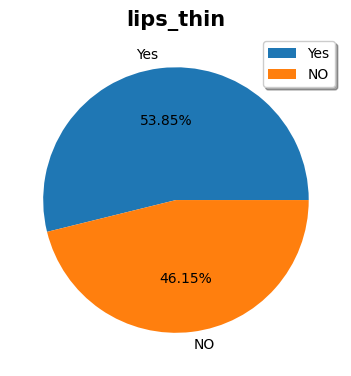

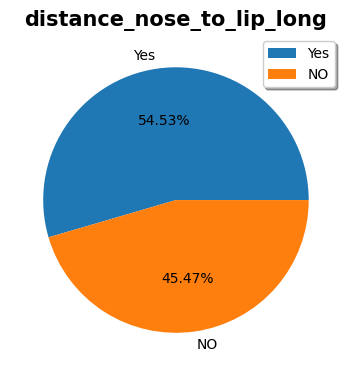

In [18]:
plt.figure(figsize=(8,20))
i = 0
for x in l:
    i = i + 1
    plt.figure(figsize=(10,25))
    plt.subplot(5,1,i)
    plt.title(x,weight='bold',fontsize=15)
    d = {0:"NO",1:"Yes"}
    plt.pie(df[x].value_counts().values,labels = df[x].value_counts().index.map(d),autopct="%.2f%%")
    plt.legend(shadow=True)
    plt.show()

In [19]:
len(df[df.forehead_width_cm > 13])

1728

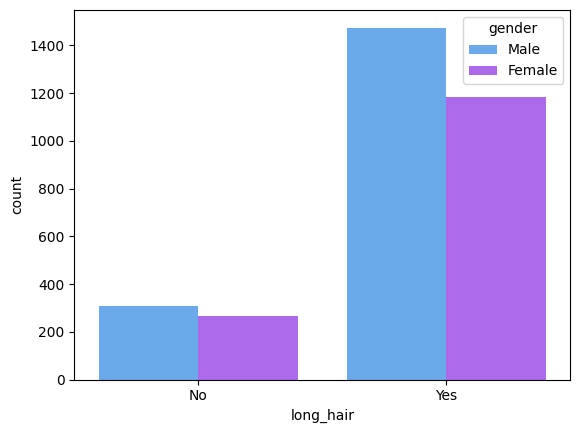

In [20]:
sns.countplot(x=df.long_hair,palette=("cool"),hue=df["gender"])
plt.xticks([0,1],labels=["No","Yes"])
plt.show()

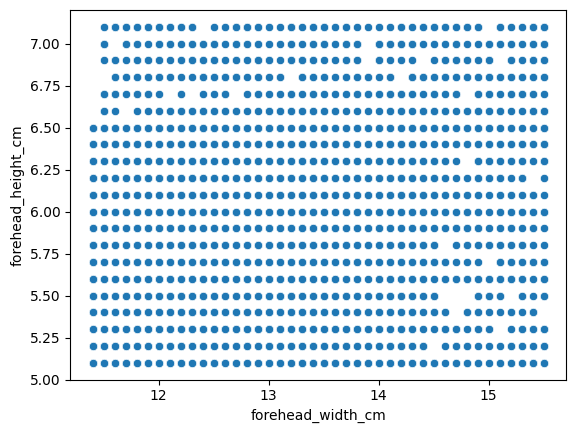

There is no correlation


In [21]:
sns.scatterplot(x=df["forehead_width_cm"],y=df["forehead_height_cm"])
plt.show()
print("There is no correlation")

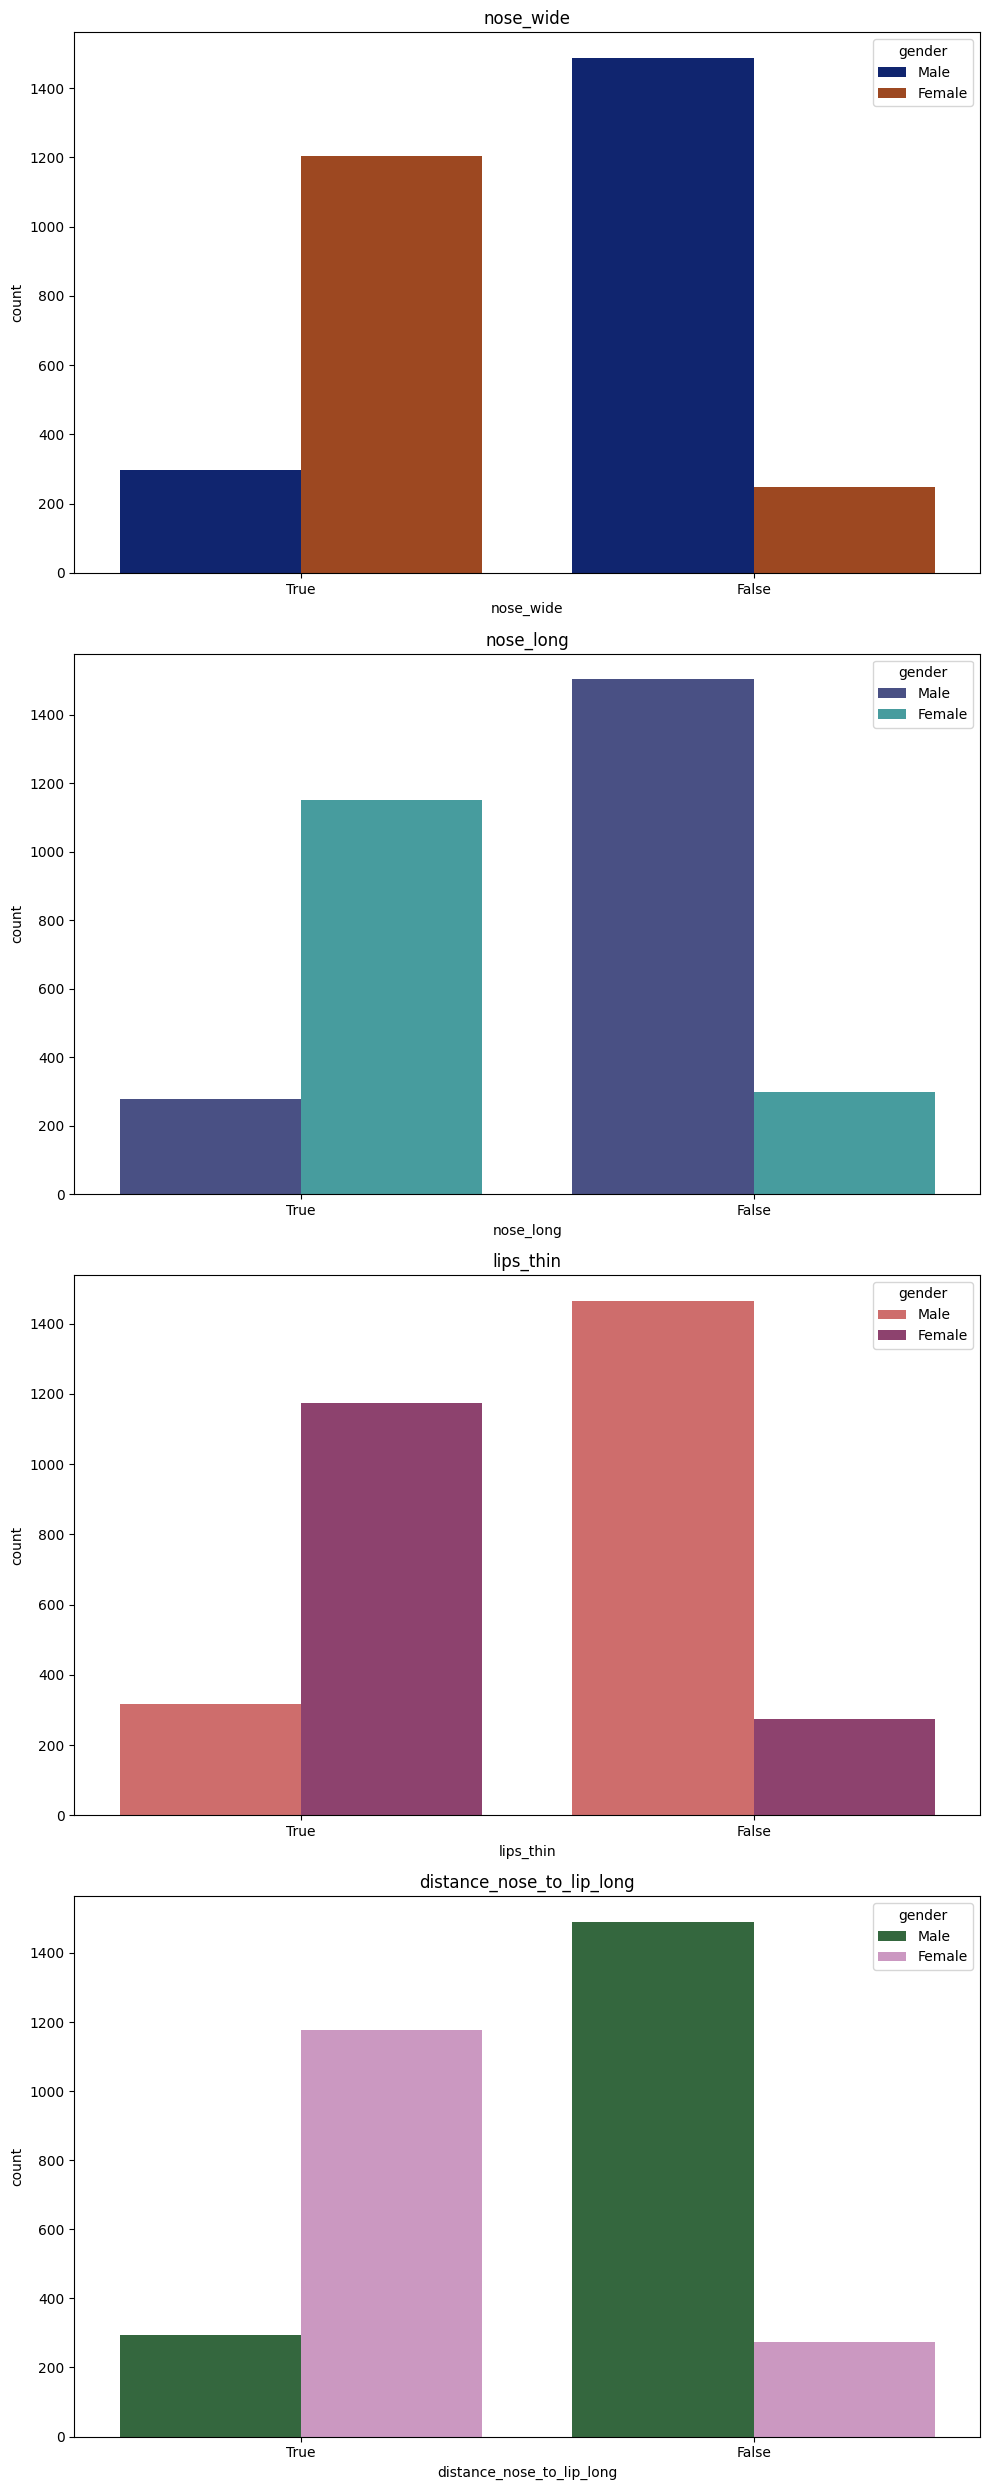

In [22]:
def plot_fun(x,i):
    l = ["dark","mako","flare","cubehelix"]
    plt.subplot(4,1,i)
    plt.title(x)
    sns.countplot(x=df[x],palette=(l[i-1]),hue=df["gender"])
    plt.xticks(ticks=[0,1],labels=["True","False"])

plt.figure(figsize=(10,25))
plot_fun("nose_wide",1)
plot_fun("nose_long",2)
plot_fun("lips_thin",3)
plot_fun("distance_nose_to_lip_long",4)
plt.tight_layout()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Preprocessing
    </h1>
    </div>

In [23]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [24]:
le = LabelEncoder()
df.gender = le.fit_transform(df.gender).astype(int)

In [25]:
si = SimpleImputer()
ss = StandardScaler()

In [26]:
mk = make_column_transformer((ss,["forehead_width_cm","forehead_height_cm"]),
                       remainder='drop')

In [27]:
x = mk.fit_transform(df)

In [28]:
df.forehead_width_cm = x[:,0]
df.forehead_height_cm = x[:,1]

In [29]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.270095,0.243699,1,0,1,1,1
1,0,0.701549,-1.029713,0,0,1,0,0
2,0,-1.270095,0.607531,1,1,1,1,1
3,0,1.060029,0.243699,0,1,1,1,1
4,1,0.253448,-0.120133,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,-1.359715,0.243699,1,1,0,1,1
4990,1,-0.553133,-0.483965,0,0,1,0,0
4992,1,0.791169,1.880943,1,1,1,1,1
4993,1,-1.449335,-0.120133,0,0,0,1,0


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Modeling
    </h1>
    </div>

In [30]:
X = df[["forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin","distance_nose_to_lip_long"]]
y = df[["gender"]]

In [31]:
X

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,-1.270095,0.243699,1,0,1,1
1,0.701549,-1.029713,0,0,1,0
2,-1.270095,0.607531,1,1,1,1
3,1.060029,0.243699,0,1,1,1
4,0.253448,-0.120133,0,0,0,0
...,...,...,...,...,...,...
4986,-1.359715,0.243699,1,1,0,1
4990,-0.553133,-0.483965,0,0,1,0
4992,0.791169,1.880943,1,1,1,1
4993,-1.449335,-0.120133,0,0,0,1


In [32]:
y

,gender
0,1
1,0
2,1
3,1
4,0
...,...
4986,1
4990,0
4992,1
4993,0


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        1.LogisticRegression
    </h1>
    </div>

In [34]:
# fitting data to model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
# model predictions

y_pred = lr.predict(X_test)

In [36]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.9462490332559939
0.964451313755796


In [37]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       284
           1       0.96      0.97      0.97       363

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        2.KNeighborsClassifier
    </h1>
    </div>

In [38]:
# fitting data to model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# model predictions

y_pred = knn.predict(X_test)

In [40]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9663573085846868
0.9505409582689336


In [41]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       284
           1       0.96      0.96      0.96       363

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        3.DecisionTreeClassifier
    </h1>
    </div>

In [42]:
# fitting data to model
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
# model predictions

y_pred = Dt.predict(X_test)

In [44]:
# accuracy score

print(accuracy_score(y_train, Dt.predict(X_train)))

Dt_acc = accuracy_score(y_test, Dt.predict(X_test))
print(Dt_acc)

0.9965197215777262
0.9489953632148377


In [45]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       284
           1       0.96      0.95      0.95       363

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        4.RandomForestClassifier
    </h1>
    </div>

In [46]:
# fitting data to model
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# model predictions

y_pred = Rf.predict(X_test)

In [48]:
# accuracy score

print(accuracy_score(y_train, Rf.predict(X_train)))

Rf_acc = accuracy_score(y_test, Rf.predict(X_test))
print(Rf_acc)

0.9965197215777262
0.9613601236476044


In [49]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       284
           1       0.96      0.97      0.97       363

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        5.SVC
    </h1>
    </div>

In [50]:
# fitting data to model
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [51]:
# model predictions

y_pred = svc.predict(X_test)

In [52]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.960170146945089
0.9721792890262752


In [53]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       284
           1       0.98      0.97      0.98       363

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        6.XGBClassifier
    </h1>
    </div>

In [54]:
# fitting data to model
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
# model predictions

y_pred = xg.predict(X_test)

In [56]:
# accuracy score

print(accuracy_score(y_train, xg.predict(X_train)))

xg_acc = accuracy_score(y_test, xg.predict(X_test))
print(xg_acc)

0.9949729311678268
0.9582689335394127


In [57]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       284
           1       0.96      0.97      0.96       363

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        7.GradientBoostingClassifier
    </h1>
    </div>

In [58]:
# fitting data to model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [59]:
# model predictions

y_pred = gbc.predict(X_test)

In [60]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)

0.9671307037896365
0.9690880989180835


In [61]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       284
           1       0.98      0.96      0.97       363

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Model DataFrame
    </h1>
    </div>

In [63]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression',  'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier','GradientBoostingClassifier'],
    'Score' : [lr_acc,  knn_acc, Dt_acc, Rf_acc, svc_acc,xg_acc, gbc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,SVC,0.972179
6,GradientBoostingClassifier,0.969088
0,LogisticRegression,0.964451
3,RandomForestClassifier,0.961360
5,XGBClassifier,0.958269
1,KNeighborsClassifier,0.950541
2,DecisionTreeClassifier,0.948995


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/jSJ5x4BM/bubbles-83683-640.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:red">Results : </h3>

<span style="font-size:120%; font-weight:700; color:black">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:black">
<ul><b>SVC </b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:grey">So, We choose <mark> SVC </mark></span>
</div>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Lock Row
    </h1>
    </div>

In [68]:
df.loc[90:90:]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
90,1,-0.821994,-0.665881,1,0,0,0,0


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Making a Predictive System
    </h1>
    </div>

In [72]:
input_data = (1,	-0.821994,	-0.665881,	1,	0,	0)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = svc.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('It is a Female')
else:
    print('It is a Male')

[0]
It is a Female


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Saving the trained model
    </h1>
    </div>

In [73]:
import pickle

In [75]:
filename = 'Gender.sav'
pickle.dump(svc, open(filename, 'wb'))

In [76]:
# loading the saved model
loaded_model = pickle.load(open('Gender.sav', 'rb'))

In [77]:
input_data = (1,	-0.821994,	-0.665881,	1,	0,	0)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('It is a Female')
else:
    print('It is a Male')

[0]
It is a Female


In [78]:
for column in X.columns:
  print(column)

forehead_width_cm
forehead_height_cm
nose_wide
nose_long
lips_thin
distance_nose_to_lip_long


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
